# games204 homework1

## 添加Games204HW1路径到搜索目录
## 安装必要rawpy用来支持arw文件的读写

In [25]:
!pip install rawpy 


In [26]:
import sys
sys.path.append('/home/aistudio/Games204HW1')

In [27]:
#添加搜索路径
import sys
sys.path.append('/home/aistudio/external-libraries')

In [1]:
from BayerDomainProcessor import *
from RGBDomainProcessor import *
from YUVDomainProcessor import *
import rawpy
import os
import sys
import time
#import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename  = "DSC02878.ARW" 
raw = rawpy.imread(filename)

In [3]:
print(raw.sizes)

ImageSizes(raw_height=4024, raw_width=6048, height=4024, width=6024, top_margin=0, left_margin=0, iheight=4024, iwidth=6024, pixel_aspect=1.0, flip=0)


## raw格式的一些参数
### xyz到rgb的转换

In [4]:
rgb2xyz = np.asarray([[0.5767309,  0.1855540,  0.1881852],
 [0.2973769,  0.6273491,  0.0752741],
 [0.0270343,  0.0706872,  0.9911085]])

xyz2rgb =  np.asarray([[2.0413690, -0.5649464, -0.3446944],
[-0.9692660,  1.8760108,  0.0415560],
 [0.0134474, -0.1183897,  1.0154096]])

In [5]:

 

raw_h, raw_w = raw.raw_image.shape
dpc_thres = 30
dpc_mode = 'gradient'
dpc_clip = raw.camera_white_level_per_channel[0]
bl_r, bl_gr, bl_gb, bl_b =  raw.black_level_per_channel
alpha, beta = 0, 0
blackLevelCompensation_clip = raw.camera_white_level_per_channel[0]
bayer_pattern = 'rggb'
r_gain, gr_gain, gb_gain, b_gain = 1/(1996/1024), 1.0, 1.0, 1/(2080/1024)
awb_clip = raw.camera_white_level_per_channel[0]
cfa_mode = 'malvar'
cfa_clip = raw.camera_white_level_per_channel[0]
csc = np.asarray([[0.299, 0.587, 0.114], [-0.1687, -0.3313, 0.5], [ 0.5,-0.4187,-0.0813], [0, 128, 128]])
ccm = np.asarray([[1024.,    0.,    0.,    0.], [   0., 1024.,    0.,    0.], [   0.,    0., 1024.,    0.]])
edge_filter = np.asarray([[-1.,  0., -1.,  0., -1.], [-1.,  0.,  8.,  0., -1.], [-1.,  0., -1.,  0., -1.]])
ee_gain, ee_thres,  ee_emclip = [32, 128], [32, 64], [-64, 64]
fcs_edge, fcs_gain, fcs_intercept, fcs_slope = [32, 64], 32, 2, 3
nlm_h, nlm_clip = 10, 255
bnf_dw = np.asarray([[8.,12.,32.,12.,8.], [12.,64.,128.,64.,12.], [32.,128.,1024.,128.,32.], [0.,0.,0.,0.,0.], [0.,0.,0.,0.,0.]])
bnf_rw, bnf_rthres, bnf_clip = [0, 8, 16, 32], [128, 32, 8], 255
ee_gain, ee_thres, ee_emclip = [32, 128],  [32, 64], [-64, 64]
dpc_thres, dpc_mode, dpc_clip  = 30, 'gradient', 4095
fcs_edge, fcs_gain, fcs_intercept, fcs_slope = [32, 32], 32, 2, 3
nlm_h,nlm_clip = 15, 255
hue, saturation, hsc_clip, brightness, contrast, bcc_clip = 128, 256, 255, 10, 10, 255


### 显示raw格式图片

--------------------------------------------------
Loading RAW Image Done......


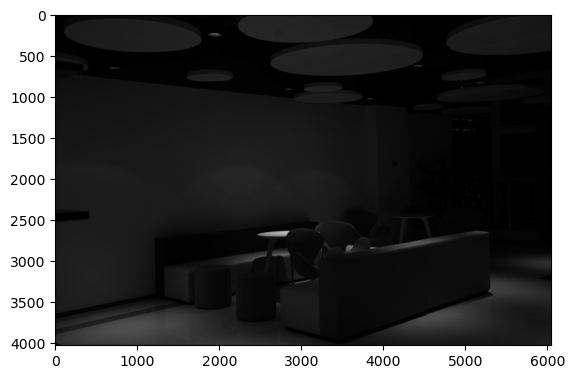

In [6]:
rawimg = raw.raw_image 
rawimg = np.clip(rawimg, raw.black_level_per_channel[0], 2**14)
print(50*'-' + '\nLoading RAW Image Done......')
plt.imshow(rawimg, cmap='gray')
plt.show()

In [34]:
raw.sizes

ImageSizes(raw_height=4024, raw_width=6048, height=4024, width=6024, top_margin=0, left_margin=0, iheight=4024, iwidth=6024, pixel_aspect=1.0, flip=0)

C:\Users\guoda\.conda\envs\games204\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


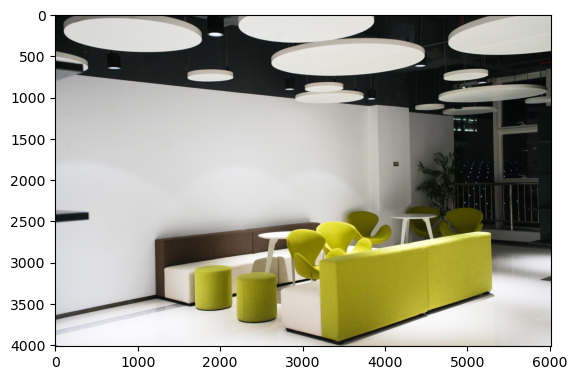

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
refImg = io.imread('ReferenceResults.JPG')
plt.imshow(refImg,cmap=None)

### dead pixel 处理

In [8]:
print(dpc_thres)
print(dpc_mode)
print(dpc_clip)
print(rawimg)

30
gradient
4095
[[ 518  553  518 ... 1416  998 1416]
 [ 553  532  543 ...  902 1426  902]
 [ 539  550  532 ... 1424  952 1424]
 ...
 [ 723  619  745 ... 1114 1719 1114]
 [ 619  716  619 ... 1744 1099 1744]
 [ 735  627  712 ... 1108 1699 1108]]


In [9]:
#################################################################################################################
#####################################  Part 1: Bayer Domain Processing Steps  ###################################
#################################################################################################################
t_start = time.time()
# Step 1. Dead Pixel Correction (10pts)
dpc = deadPixelCorrection(rawimg, dpc_thres, dpc_mode, dpc_clip)
Bayer_dpc = dpc.execute()
print(50*'-' + '\n 1.1 Dead Pixel Correction Done......')

--------------------------------------------------
 1.1 Dead Pixel Correction Done......


In [13]:
dpc = deadPixelCorrection(rawimg, dpc_thres, dpc_mode, dpc_clip)


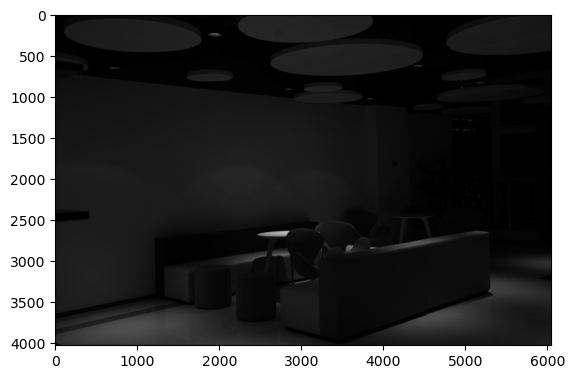

In [10]:
plt.imshow(Bayer_dpc,cmap='gray')

In [23]:
print(Bayer_dpc)

1


### dead pixel correctoin

<image src="deadpixelcorrection.png"  width = "30%" height = "30%">


## black level compensation

<image src = "blacklevelcompensation.png" width ="30%" height = "30%">

### 白平衡

 <image src = "auto_white_balance_gain_control.png" width = "10%"  height = "10%">
